# Data Preprocessing

## Import neccesary libarys

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the DataSet

In [48]:
# Load the dataset
# data = pd.read_csv('bank.csv' , sep=';')
data = pd.read_csv('bank-full.csv' , sep=';')

# View the first few rows
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [49]:
#view the last few rows
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Sanity check data

In [50]:
# Check the shape of the data
# cloums and rows
data.shape

(45211, 17)

In [51]:
# Check column information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
# Check for missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [53]:
#check for duplicates
data.duplicated().sum()

np.int64(0)

In [54]:
#identify the unique values and garbage values
for i in data.select_dtypes(include='object').columns:
    print(f'\nUnique values in {i} are {data[i].unique()}')


Unique values in job are ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital are ['married' 'single' 'divorced']

Unique values in education are ['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default are ['no' 'yes']

Unique values in housing are ['yes' 'no']

Unique values in loan are ['no' 'yes']

Unique values in contact are ['unknown' 'cellular' 'telephone']

Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome are ['unknown' 'failure' 'other' 'success']

Unique values in y are ['no' 'yes']


## Missing Value Treatment

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [56]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
for col in data.columns:
    if data[col].isnull().sum() > 0:
        # For categorical columns
        if data[col].dtype == 'object':
            data[col].fillna(data[col].mode()[0], inplace=True) 
        else:
            data[col].fillna(data[col].median(), inplace=True)  # Fill numerical with median

print("Missing values treated.")


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Missing values treated.


In [57]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Duplicate and Garbage value treatment

In [58]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
data = data.drop_duplicates()

Number of duplicate rows: 0


## Exploratory Data Analysis (EDA)

In [59]:
# Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [60]:
data.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


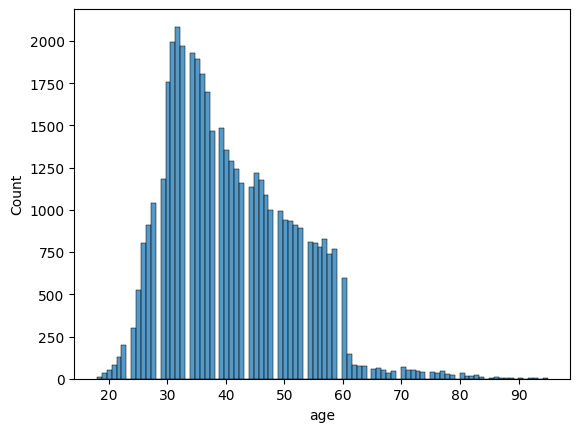

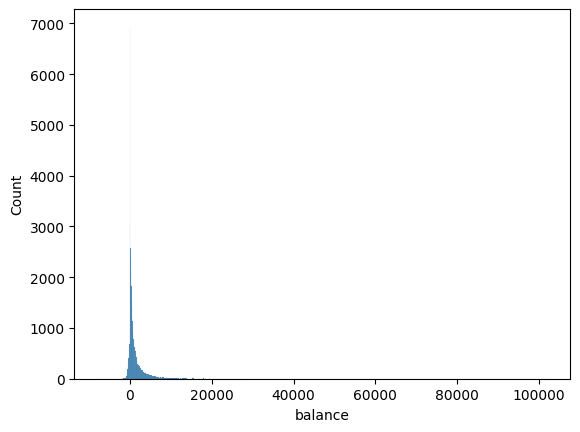

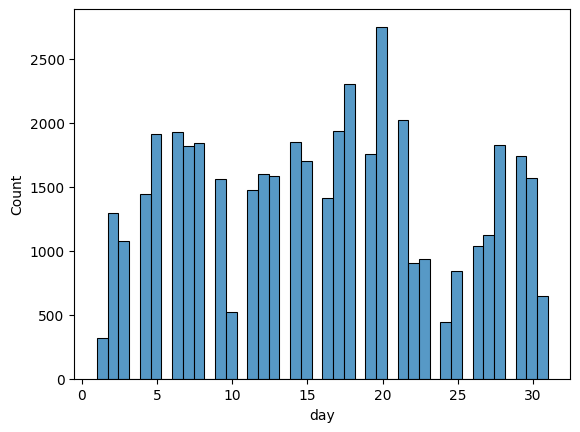

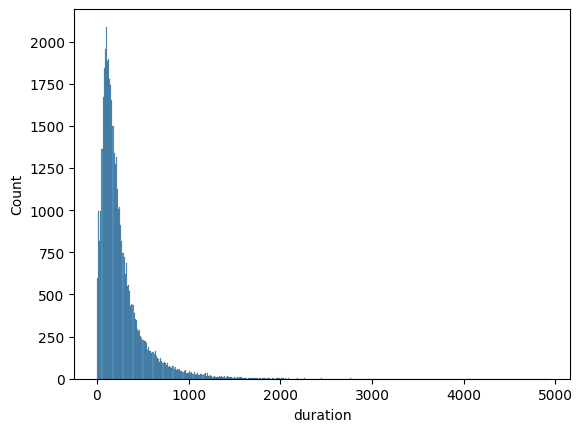

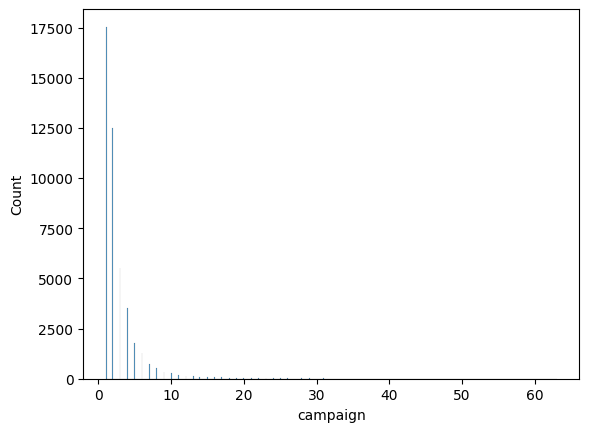

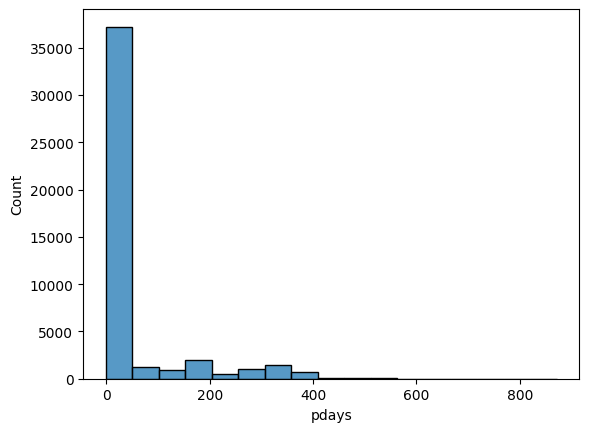

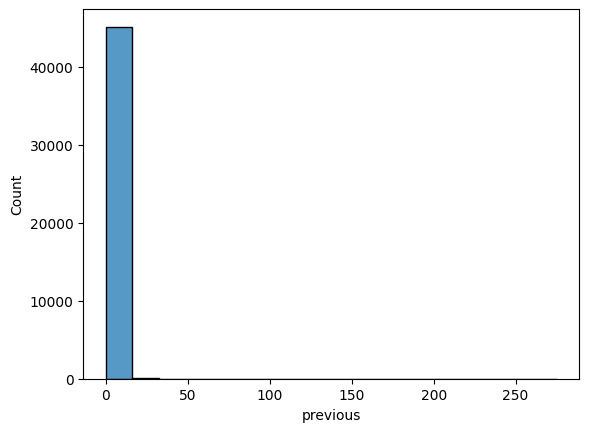

In [61]:
#histogram to understand the distribution of the data
for i in data.select_dtypes(include='number').columns:
    sns.histplot(data=data, x= i)
    plt.show()

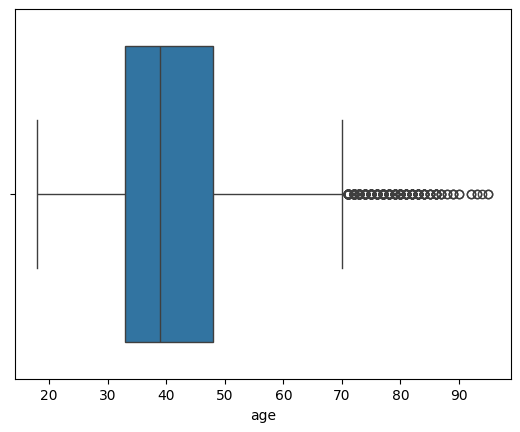

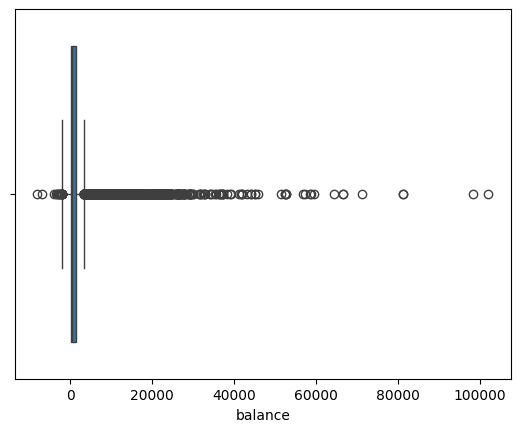

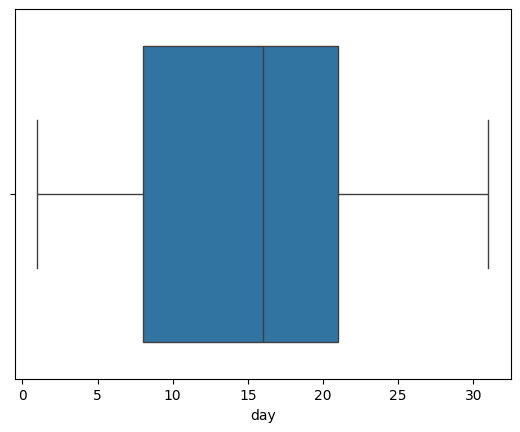

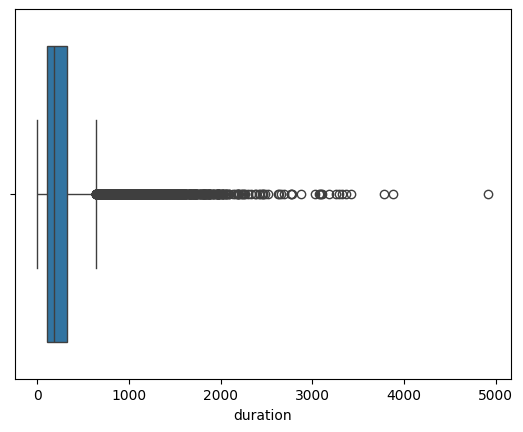

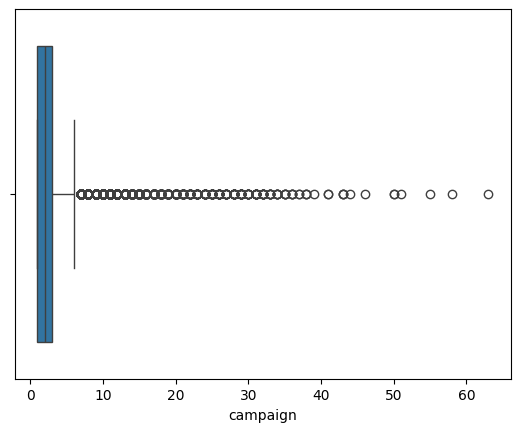

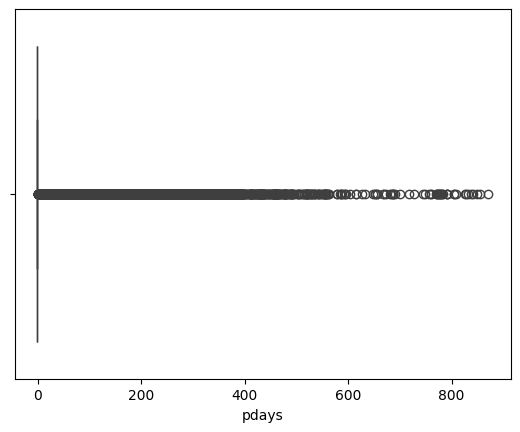

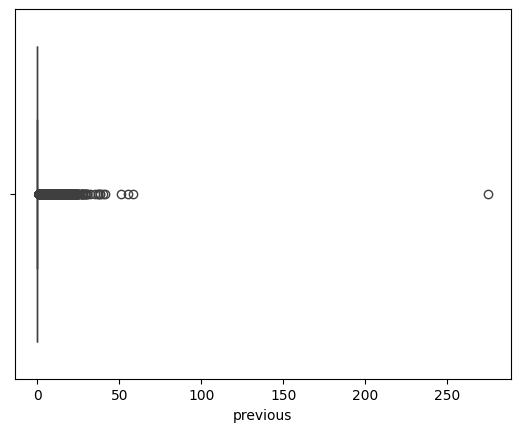

In [62]:
# Boxplot to identify the outliers
for i in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x= i)
    plt.show()

In [63]:
# #scatter plot to understand the relationship between the variables
# for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
#     sns.scatterplot(data=data, x=i, y=data['y'])
#     plt.show() 

In [64]:
data.select_dtypes(include='number').columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

<Axes: >

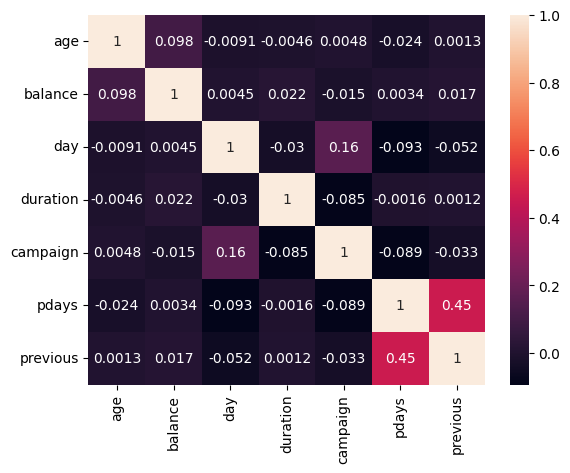

In [65]:
#correlation heatmap to interpreat the realationship and mulitcollinearity 
s = data.select_dtypes(include='number').corr()
sns.heatmap(s, annot=True)

## Outlier Treatment

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [67]:
# for col in ['age', 'balance', 'campaign', 'duration']:
#     if data[col].dtype == 'int64':
#         # Calculate IQR for detecting outliers
#         Q1 = data[col].quantile(0.25)
#         Q3 = data[col].quantile(0.75)
#         IQR = Q3 - Q1

#         # Define the lower and upper limits for outliers
#         lower_limit = Q1 - 1.5 * IQR
#         upper_limit = Q3 + 1.5 * IQR

#         # Cap the values in the column to the defined limits
#         data[col] = np.where(data[col] < lower_limit, lower_limit, data[col])
#         data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

#         # Convert the column to integer type if it originally contained integers
    
#         data[col] = data[col].astype(int)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


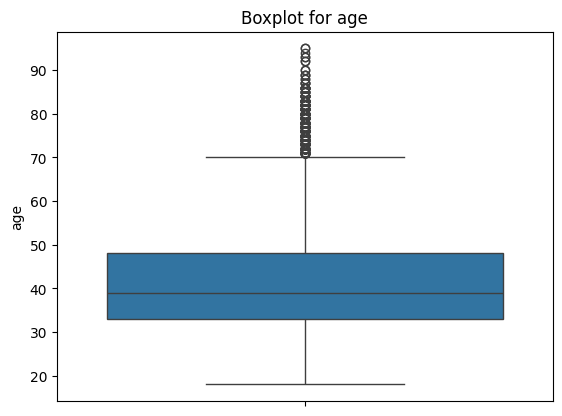

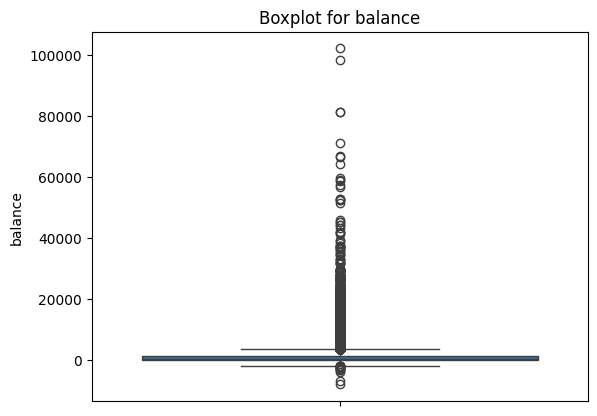

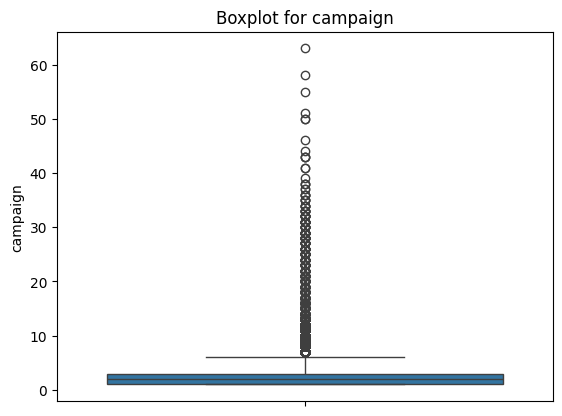

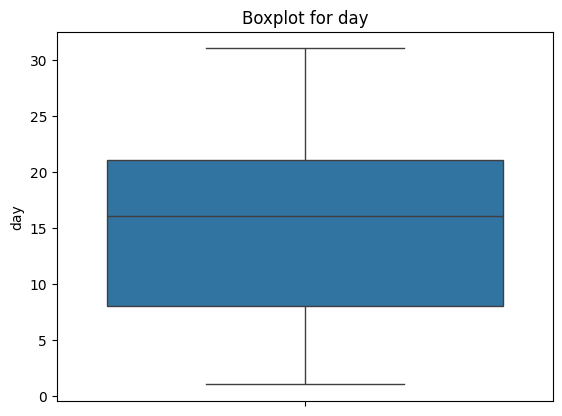

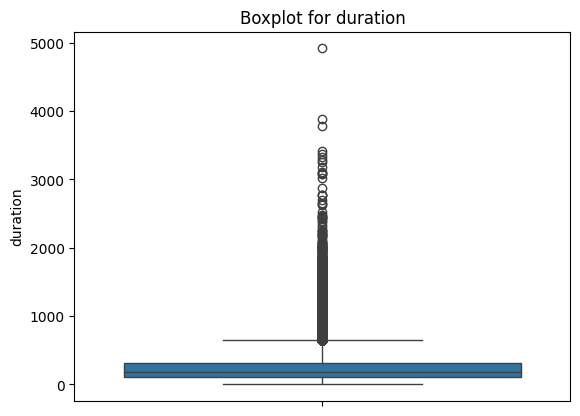

In [69]:

for col in ['age', 'balance', 'campaign', 'day', 'duration']:
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


# Feature Engineering

## Feature transformation

## Encoding the data

In [70]:
# data.info()

In [71]:
# Binary Features
binary_columns = ['default', 'housing', 'loan', 'y']

for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})


In [72]:
# Categorical Features
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome'] 

# for col in categorical_columns:
#     data[col] = data[col].astype('category')

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data = data.astype('int64')


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_blue-collar      45211 non-null  int64
 12  job_entrepreneur     45211 non-null  int64
 13  job_housemaid        45211 non-null  int64
 14  job_management       45211 non-null  int64
 15  job_retired          45211 non-null  int64
 16  job_self-employed    4

In [74]:
# data.info()

In [75]:
# data.shape

In [76]:
# data.head()

In [77]:
# # Save the processed DataFrame to a CSV file
# data.to_csv("processed_t.csv", index=False)  # Use index=False to avoid saving the index as a separate column

#  Normalize/Scale Numerical Features 

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [79]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0,0.092259,1,0,5,0.053070,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
1,0.337662,0,0.073067,1,0,5,0.030704,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
2,0.194805,0,0.072822,1,1,5,0.015453,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,0.376623,0,0.086476,1,0,5,0.018707,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,0.194805,0,0.072812,0,0,5,0.040260,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [149]:
data.to_csv('preprocessed_data.csv', index=False)

# Split the Data

In [80]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# MOdel IMpementing

## RF using scikit 

Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.9054517306203693
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



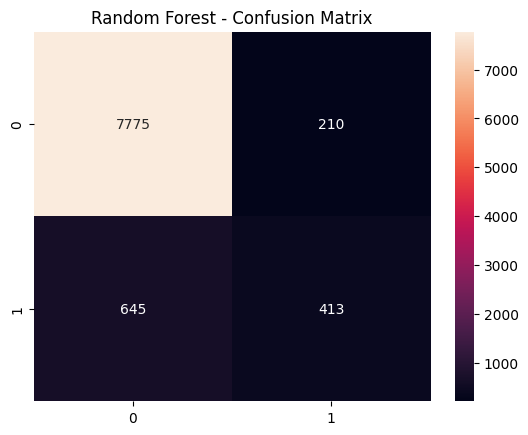

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Training Accuracy:", accuracy_score(y_train, rf_y_pred_train))
print("Random Forest - Test Accuracy:", accuracy_score(y_test, rf_y_pred_test))

# Classification Report
print("Random Forest - Classification Report:")
print(classification_report(y_test, rf_y_pred_test))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_y_pred_test), annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.show()


## NN using tensorflow 

In [83]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.metrics import accuracy_score, classification_report

# # Build Neural Network Model
# nn_model = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# # Compile Model
# nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the Model
# early_stop = EarlyStopping(monitor='val_loss', patience=5)
# history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# # Predictions
# nn_test_preds = (nn_model.predict(X_test) > 0.5).astype("int32")

# nn_ten =accuracy_score(y_test, nn_test_preds)

# # Evaluation
# print("Neural Network - Testing Accuracy:", nn_ten)
# print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))


Epoch 1/50


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8895 - loss: 0.3171 - val_accuracy: 0.8960 - val_loss: 0.2547
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.8989 - loss: 0.2527 - val_accuracy: 0.9041 - val_loss: 0.2244
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.9029 - loss: 0.2280 - val_accuracy: 0.8996 - val_loss: 0.2185
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9065 - loss: 0.2122 - val_accuracy: 0.9063 - val_loss: 0.2100
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.9043 - loss: 0.2166 - val_accuracy: 0.9016 - val_loss: 0.2271
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9060 - loss: 0.2084 - val_accuracy: 0.9053 - val_loss: 0.2250
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9062 - loss: 0.2096 - val_accuracy: 0.9034 - val_loss: 0.2185
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9104 - loss: 0.1976 - val_accurac

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Build Neural Network Model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), name="Input_Layer"),
    Dense(64, activation='relu', name="Hidden_Layer1"),
    Dense(32, activation='relu', name="Hidden_Layer2"),
    Dense(1, activation='sigmoid', name="Output_Layer")  # Binary classification
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
history = nn_model.fit(
    X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1
)

# Evaluate on Test Set
nn_test_preds = (nn_model.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, nn_test_preds)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))


Epoch 1/50


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.8888 - loss: 0.3165 - val_accuracy: 0.8955 - val_loss: 0.2460
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.9012 - loss: 0.2424 - val_accuracy: 0.9032 - val_loss: 0.2198
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 729us/step - accuracy: 0.9005 - loss: 0.2233 - val_accuracy: 0.9056 - val_loss: 0.2109
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9066 - loss: 0.2155 - val_accuracy: 0.9039 - val_loss: 0.2118
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9060 - loss: 0.2137 - val_accuracy: 0.9072 - val_loss: 0.2104
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9045 - loss: 0.2118 - val_accuracy: 0.9066 - val_loss: 0.2107
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.9097 - loss: 0.2058 - val_accuracy: 0.9030 - val_loss: 0.2126
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.9067 - loss: 0.2042 - val_accurac

## NN using pytorch

In [85]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from torch.utils.data import DataLoader, TensorDataset


# # Convert DataFrames to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Create DataLoader for batching
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
#         self.relu = nn.ReLU()                         # Activation function
#         self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Define model parameters
# input_size = X_train.shape[1]  # Number of features
# hidden_size = 64               # Number of neurons in the hidden layer
# output_size = len(y_train.unique())  # Number of output classes (binary: 2)

# # Initialize the model
# model = NeuralNet(input_size, hidden_size, output_size)

# criterion = nn.CrossEntropyLoss()  # Loss function for classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# # Training the model
# epochs = 20
# model.train()

# for epoch in range(epochs):
#     epoch_loss = 0
#     for X_batch, y_batch in train_loader:
#         # Forward pass
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

# # Evaluation
# model.eval()
# y_pred = []
# y_true = []

# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_pred.extend(predicted.numpy())
#         y_true.extend(y_batch.numpy())

# # Metrics
# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("Classification Report:")
# print(classification_report(y_true, y_pred))

# # Confusion Matrix
# sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.show()



Epoch 1/20, Loss: 0.3000, Accuracy: 0.8885
Epoch 2/20, Loss: 0.2487, Accuracy: 0.8990
Epoch 3/20, Loss: 0.2325, Accuracy: 0.9027
Epoch 4/20, Loss: 0.2241, Accuracy: 0.9039
Epoch 5/20, Loss: 0.2191, Accuracy: 0.9055
Epoch 6/20, Loss: 0.2146, Accuracy: 0.9064
Epoch 7/20, Loss: 0.2113, Accuracy: 0.9055
Epoch 8/20, Loss: 0.2091, Accuracy: 0.9067
Epoch 9/20, Loss: 0.2058, Accuracy: 0.9069
Epoch 10/20, Loss: 0.2036, Accuracy: 0.9089
Epoch 11/20, Loss: 0.2019, Accuracy: 0.9088
Epoch 12/20, Loss: 0.2003, Accuracy: 0.9099
Epoch 13/20, Loss: 0.1987, Accuracy: 0.9106
Epoch 14/20, Loss: 0.1974, Accuracy: 0.9120
Epoch 15/20, Loss: 0.1959, Accuracy: 0.9109
Epoch 16/20, Loss: 0.1953, Accuracy: 0.9121
Epoch 17/20, Loss: 0.1947, Accuracy: 0.9111
Epoch 18/20, Loss: 0.1927, Accuracy: 0.9133
Epoch 19/20, Loss: 0.1919, Accuracy: 0.9132
Epoch 20/20, Loss: 0.1912, Accuracy: 0.9138


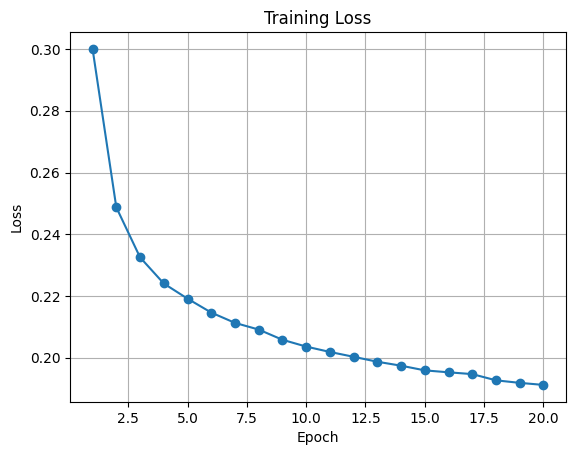

Accuracy: 0.9072210549596373
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.63      0.49      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



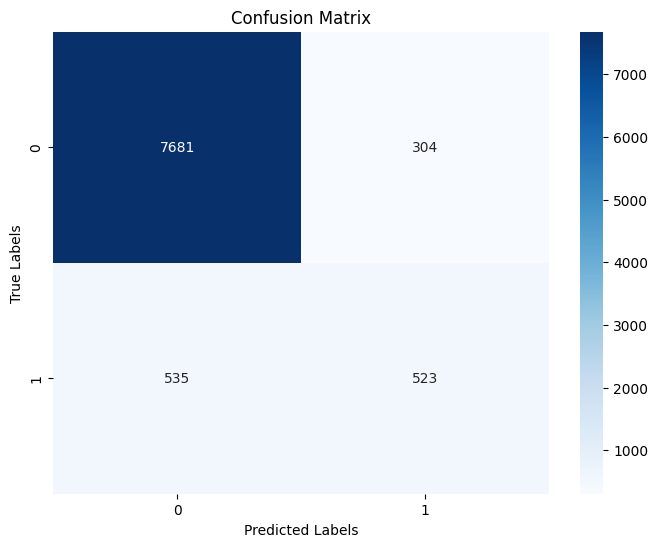

Model saved as 'neural_net_model.pth'


In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset

# Ensure reproducibility
torch.manual_seed(42)

# Convert preprocessed DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.relu = nn.ReLU()                         # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define model parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 64               # Number of neurons in the hidden layer
output_size = len(y_train.unique())  # Number of output classes

# Initialize the model
model = NeuralNet(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training the model
epochs = 20
losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_accuracy = correct / total
    losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

# Plot training loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# # Save the model
# torch.save(model.state_dict(), 'neural_net_model.pth')
# print("Model saved as 'neural_net_model.pth'")


# Evaluation

In [87]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have these variables
# rf_y_pred_test: Predicted labels from Random Forest
# nn_y_pred_test_pytorch: Predicted labels from PyTorch Neural Network (y_pred)
# nn_y_pred_test_tensorflow: Predicted labels from TensorFlow Neural Network (nn_test_preds)
# y_test: True labels (ground truth)

# Calculate accuracies using the predicted labels
rf_accuracy = accuracy_score(y_test, rf_y_pred_test)  # Random Forest Accuracy
nn_accuracy = accuracy_score(y_test, y_pred)  # Neural Network Accuracy (PyTorch)
nn_ten_accuracy = accuracy_score(y_test, nn_test_preds)  # Neural Network Accuracy (TensorFlow)

# Printing the accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network Accuracy (PyTorch): {nn_accuracy:.4f}")
print(f"Neural Network Accuracy (TensorFlow): {nn_ten_accuracy:.4f}")


Random Forest Accuracy: 0.9055
Neural Network Accuracy (PyTorch): 0.9072
Neural Network Accuracy (TensorFlow): 0.9037


In [88]:
# # Compare Accuracies
# rf_accuracy = accuracy_score(y_test, rf_y_pred_test)  # Corrected variable
# nn_accuracy = accuracy_score(y_true, y_pred)

# print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
# print(f"Neural Network Accuracy Pytorch: {nn_accuracy:.4f}")
# print(f"Neural Network Accuracy tensorflow: {nn_ten:.4f}")

# if nn_accuracy > rf_accuracy:
#     print("Neural Network performs better.")
# elif rf_accuracy > nn_accuracy:
#     print("Random Forest performs better.")
# else:
#     print("Both models perform equally well.")


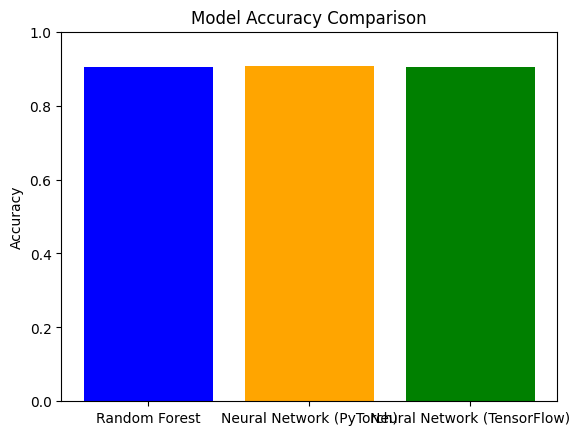

In [89]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracies
model_names = ['Random Forest', 'Neural Network (PyTorch)', 'Neural Network (TensorFlow)']
accuracies = [rf_accuracy, nn_accuracy, nn_ten_accuracy]

# Create the bar chart
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

# Set the y-axis limit to range from 0 to 1 (accuracy is between 0 and 1)
plt.ylim(0, 1)

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the bar chart
plt.show()


In [90]:
# # Bar Chart for Accuracy Comparison
# model_names = ['Random Forest', 'Neural Network']
# accuracies = [rf_accuracy, nn_accuracy]

# plt.bar(model_names, accuracies, color=['blue', 'orange'])
# plt.ylim(0, 1)
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')
# plt.show()


# Tunning

#### RF tunning

In [92]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# # Initialize model
# rf = RandomForestClassifier(random_state=42)

# # Grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best parameters and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)


In [94]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     # 'bootstrap': [True, False]
# }

# # Initialize the Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and cross-validated accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# # Use the best model to predict on the test set
# best_rf_model = grid_search.best_estimator_
# rf_y_pred_test = best_rf_model.predict(X_test)

# rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test)

# # Evaluate on the test set
# print("Random Forest - Test Accuracy after Tuning:", rf_accuracy_tuned)
# print("Random Forest - Classification Report after Tuning:")
# print(classification_report(y_test, rf_y_pred_test))


Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best Cross-Validated Accuracy: 0.9065197254878982
Random Forest - Test Accuracy after Tuning: 0.9064469755612076
Random Forest - Classification Report after Tuning:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.64      0.45      0.53      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043



In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    # 'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters and cross-validated accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Use the best model to predict on the test set
best_rf_model = grid_search.best_estimator_
rf_y_pred_test = best_rf_model.predict(X_test)

rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test)

# Evaluate on the test set
print("Random Forest - Test Accuracy after Tuning:", rf_accuracy_tuned)
print("Random Forest - Classification Report after Tuning:")
print(classification_report(y_test, rf_y_pred_test))


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validated Accuracy: 0.906381477913509
Random Forest - Test Accuracy after Tuning: 0.9068893066460245
Random Forest - Classification Report after Tuning:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.68      0.39      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.90      9043



In [155]:
# Calculate training accuracy
rf_y_pred_train = best_rf_model.predict(X_train)

# Evaluate on the training set
rf_accuracy_train = accuracy_score(y_train, rf_y_pred_train)

print("Random Forest - Training Accuracy after Tuning:", rf_accuracy_train)


Random Forest - Training Accuracy after Tuning: 0.9661855784118558


#### tenorflow

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
import keras_tuner as kt  # Import Keras Tuner

# Define the model builder function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    # Input Layer
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=256, step=32), 
                    activation='relu', input_shape=(X_train.shape[1],), name="Input_Layer"))
    # Hidden Layers
    for i in range(hp.Int('num_hidden_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=16), 
                        activation='relu', name=f"Hidden_Layer{i+1}"))
    # Output Layer
    model.add(Dense(1, activation='sigmoid', name="Output_Layer"))

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train for each trial
    directory='hyper_tuning',
    project_name='nn_tuning'
)

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Perform the search
tuner.search(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the input layer is {best_hps.get('units_input')}.
The optimal number of hidden layers is {best_hps.get('num_hidden_layers')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop])

# Evaluate the tuned model on the test set
nn_test_preds = (best_model.predict(X_test) > 0.5).astype("int32")
nn_tenorflow_test_accuracy = accuracy_score(y_test, nn_test_preds)
print("Testing Accuracy after Tuning:", nn_tenorflow_test_accuracy)
print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))




Reloading Tuner from hyper_tuning\nn_tuning\tuner0.json

The optimal number of units in the input layer is 224.
The optimal number of hidden layers is 1.
The optimal learning rate is 0.001.

Epoch 1/50


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.8858 - loss: 0.3235 - val_accuracy: 0.8958 - val_loss: 0.2707
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.9010 - loss: 0.2419 - val_accuracy: 0.9027 - val_loss: 0.2233
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9025 - loss: 0.2273 - val_accuracy: 0.9068 - val_loss: 0.2170
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.9027 - loss: 0.2213 - val_accuracy: 0.9085 - val_loss: 0.2092
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9051 - loss: 0.2083 - val_accuracy: 0.9036 - val_loss: 0.2152
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9050 - loss: 0.2132 - val_accuracy: 0.9061 - val_loss: 0.2175
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9068 - loss: 0.2074 - val_accuracy: 0.9083 - val_loss: 0.2096
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9103 - loss: 0.1987 - val_accurac

#### NN tunnung 

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define the Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, device, epochs=20):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# Function to evaluate the model
def evaluate_model(model, test_loader, device):
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    return accuracy_score(y_true, y_pred)

# Hyperparameter search
hidden_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]

best_accuracy = 0
best_hyperparameters = {}

for hidden_size in hidden_sizes:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Prepare data loaders
            train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
                                           torch.tensor(y_train.values, dtype=torch.long))
            test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
                                          torch.tensor(y_test.values, dtype=torch.long))
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

            # Initialize model, loss, and optimizer
            model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Train and evaluate
            train_model(model, train_loader, criterion, optimizer, device, epochs=20)
            accuracy = evaluate_model(model, test_loader, device)

            # Save best hyperparameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}

            print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy:.4f}")

# Output the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Accuracy: {best_accuracy:.4f}")


Using device: cuda
Epoch 1/20, Loss: 0.2955
Epoch 2/20, Loss: 0.2442
Epoch 3/20, Loss: 0.2293
Epoch 4/20, Loss: 0.2220
Epoch 5/20, Loss: 0.2174
Epoch 6/20, Loss: 0.2134
Epoch 7/20, Loss: 0.2110
Epoch 8/20, Loss: 0.2084
Epoch 9/20, Loss: 0.2078
Epoch 10/20, Loss: 0.2065
Epoch 11/20, Loss: 0.2051
Epoch 12/20, Loss: 0.2041
Epoch 13/20, Loss: 0.2029
Epoch 14/20, Loss: 0.2019
Epoch 15/20, Loss: 0.2010
Epoch 16/20, Loss: 0.2004
Epoch 17/20, Loss: 0.2006
Epoch 18/20, Loss: 0.1991
Epoch 19/20, Loss: 0.1981
Epoch 20/20, Loss: 0.1977
Hidden Size: 32, LR: 0.001, Batch Size: 16, Accuracy: 0.9031
Epoch 1/20, Loss: 0.3079
Epoch 2/20, Loss: 0.2565
Epoch 3/20, Loss: 0.2376
Epoch 4/20, Loss: 0.2297
Epoch 5/20, Loss: 0.2234
Epoch 6/20, Loss: 0.2196
Epoch 7/20, Loss: 0.2156
Epoch 8/20, Loss: 0.2130
Epoch 9/20, Loss: 0.2114
Epoch 10/20, Loss: 0.2095
Epoch 11/20, Loss: 0.2076
Epoch 12/20, Loss: 0.2058
Epoch 13/20, Loss: 0.2051
Epoch 14/20, Loss: 0.2036
Epoch 15/20, Loss: 0.2018
Epoch 16/20, Loss: 0.2013
Ep

# evaluation

In [126]:
from sklearn.metrics import accuracy_score, classification_report

# After tuning, you already have the best_rf_model (tuned Random Forest model)

# Predict the outcomes on the test set
rf_y_pred_test_tuned = best_rf_model.predict(X_test)

# Calculate accuracy after tuning for the Random Forest model
rf_accuracy_tuned = accuracy_score(y_test, rf_y_pred_test_tuned)


### delete above

# Print the accuracy after tuning
print(f"Random Forest Accuracy (Tuned): {rf_accuracy_tuned:.4f}")

# Optionally, print the classification report for further evaluation
print("\nRandom Forest Classification Report (Tuned):")
print(classification_report(y_test, rf_y_pred_test_tuned))


Random Forest Accuracy (Tuned): 0.9064

Random Forest Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.64      0.45      0.53      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043



In [125]:
# Output the best hyperparameters
print(f"Best Hyperparameters: {best_hyperparameters}")
print(f"Best Accuracy: {best_accuracy:.4f}")



Best Hyperparameters: {'hidden_size': 32, 'lr': 0.001, 'batch_size': 32}
Best Accuracy: 0.9090


In [129]:

# Print the accuracy after tuning
print(f"TensorFlow Neural Network Accuracy (Tuned): {nn_tenorflow_test_accuracy:.4f}")

# Optionally, print the classification report for further evaluation
print("\nTensorFlow Neural Network Classification Report (Tuned):")
print(classification_report(y_test, nn_test_preds))


TensorFlow Neural Network Accuracy (Tuned): 0.9057

TensorFlow Neural Network Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.62      0.50      0.55      1058

    accuracy                           0.91      9043
   macro avg       0.78      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



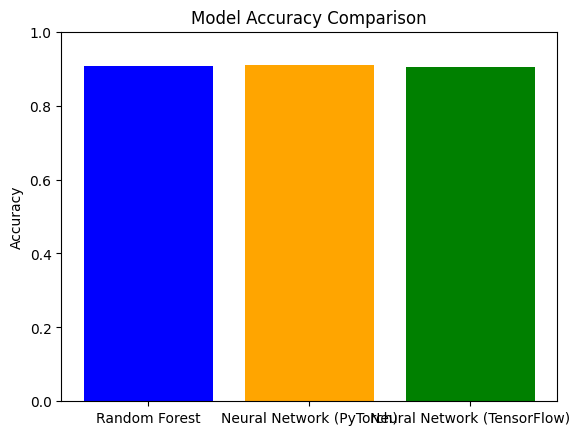

In [131]:
import matplotlib.pyplot as plt

# List of model names and their corresponding accuracies
model_names = ['Random Forest', 'Neural Network (PyTorch)', 'Neural Network (TensorFlow)']
accuracies = [rf_accuracy_tuned, best_accuracy, nn_tenorflow_test_accuracy]

# Create the bar chart
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])

# Set the y-axis limit to range from 0 to 1 (accuracy is between 0 and 1)
plt.ylim(0, 1)

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the bar chart
plt.show()

# saving the model

In [145]:
import joblib

# Save the best Random Forest model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
print("Random Forest model saved successfully!")


Random Forest model saved successfully!


In [150]:
# Save the entire model
torch.save(model, 'best_tuned_model_PY.pth')
print("Tuned model saved successfully!")

Tuned model saved successfully!


In [151]:
# Save the tuned model
best_model.save("best_tuned_mode_Ten.h5")
print("Tuned model saved as 'best_tuned_model.h5'")

Tuned model saved as 'best_tuned_model.h5'
